# SPAM SMS DETECTION

### Task:
Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv("spam.csv", encoding="latin1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis='columns',inplace=True)

In [33]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Change headings from v1 and v2 to Category and Message

In [34]:
Change_Column_Name = {'v1': 'Category', 'v2': 'Message'}

In [35]:
data.rename(columns=Change_Column_Name, inplace=True)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

### Data Visualization 

Text(0.5, 1.0, 'Number of ham and spam messages')

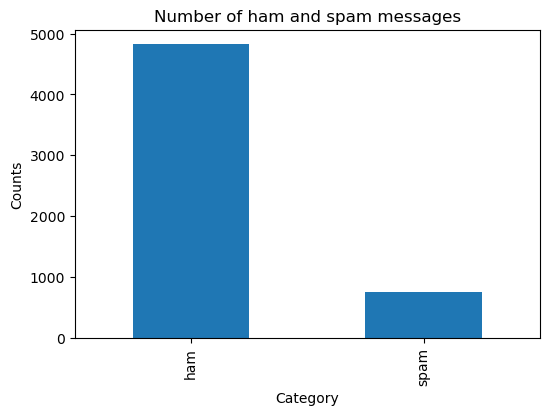

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title("Number of ham and spam messages")

### We need to convert both Categoryand Message columns into numbers


In [38]:
data['spam'] = data['Category'].apply(lambda x: 1 if x=='spam' else 0)
#Dropping Category Column
data.drop(["Category"],axis='columns',inplace=True)
data.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam)

### Convert Message column into number
The way to convert text into numbers is using CountVectorizer Technique
CountVectorizer is a text preprocessing technique in natural language processing (NLP) and machine learning that is used to convert text data into numerical vectors. It's a method to transform text into a format that machine learning models can understand and process.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Naive Bayes Algorithm
Using Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

### Sklearn have a feature called pipeline where we can define the pipeline of our transformation

In [42]:
#We are tryig to simplify the same above code
#Import the pipeline
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
#First step "('vectorizer', CountVectorizer())" is to convert my text into numbers or CountVectorizer and then
#apply the Multinomial Naive Bayes

In [44]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [45]:
#Now check the performance of model
clf.score(X_test,y_test)

0.990667623833453

### Now model is ready to make predictions
I am randomly taking 2 messages from my csv file, from which one is ham and other is span, to check if my model is working properly or not 

In [46]:
message = [
    "Dont worry. I guess he's busy.",
    "URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U! Call from Landline 09064019788 BOX42WR29C, 150PPM"
]
clf.predict(message)

array([0, 1], dtype=int64)

In [47]:
y_pred = clf.predict(X_test)

### Confusion Matrix

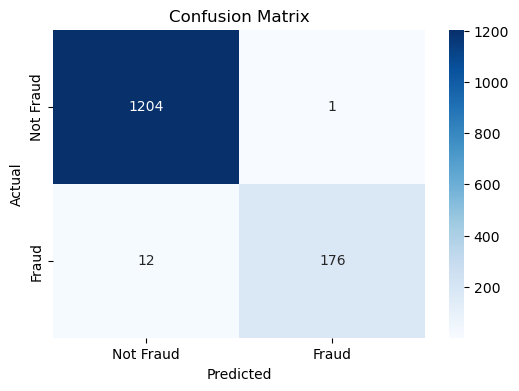

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.990667623833453
Precision: 0.9943502824858758
Recall: 0.9361702127659575
F1 Score: 0.9643835616438357
ROC AUC Score: 0.9676701686236426
